In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap


In [2]:

data = load_iris()
X = data.data[:, :2] 
y = data.target

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)


SVC(gamma='auto')

In [4]:
y_pred = model.predict(X_test)
print("Kernel SVM accuracy:", accuracy_score(y_test, y_pred))

Kernel SVM accuracy: 0.8666666666666667


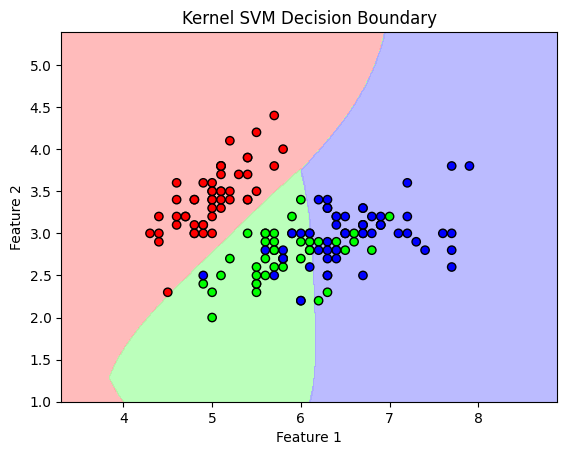

In [5]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title('Kernel SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()